# Modele analizy danych

Tomasz Rodak

---

### Zadanie 5.1

Zbiór [`Auto.csv`](https://www.statlearning.com/s/Auto.csv) zawiera dane dotyczące modeli samochodów. Dane zawierają następujące kolumny:

1. `mpg` -- liczba mil, jakie samochód przejeżdża na jednym galonie paliwa,
2. `cylinders` -- liczba cylindrów w silniku,
3. `displacement` -- pojemność silnika (w calach sześciennych),
4. `horsepower` -- moc silnika,
5. `weight` -- waga samochodu (w funtach),
6. `acceleration` -- przyspieszenie (w sekundach od 0 do 60 mil na godzinę),
7. `year` -- rok produkcji (modulo 100),
8. `origin` -- pochodzenie samochodu (1. USA, 2. Europa, 3. Japonia),
9. `name` -- nazwa samochodu.

Zmienną objaśnianą jest `mpg`, pozostałe zmienne są zmiennymi objaśniającymi.

Pobierz do ramki danych `pd.DataFrame` zbiór [`Auto.csv`](https://www.statlearning.com/s/Auto.csv).

1. Wykonaj wykresy rozproszenia wszystkich par zmiennych numerycznych względem siebie (`pd.plotting.scatter_matrix` lub `sns.pairplot`).
2. Zbuduj macierz korelacji zmiennych numerycznych (`pd.DataFrame.corr` plus `sns.heatmap`).

Skomentuj wyniki.

In [3]:
!pip install ISLP

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 832.4/832.4 kB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 11.7 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=ff75dd0006105dd47ef7fe3844f3434fc1a42e134ab55c698a7d4babdb069aa8
  Stored in directory: /root/.cache/pip/wheels/50/37/21/0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma


In [11]:
from ISLP import load_data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = load_data('Auto')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, chevrolet chevelle malibu to chevy s-10
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 35.7+ KB


<Axes: >

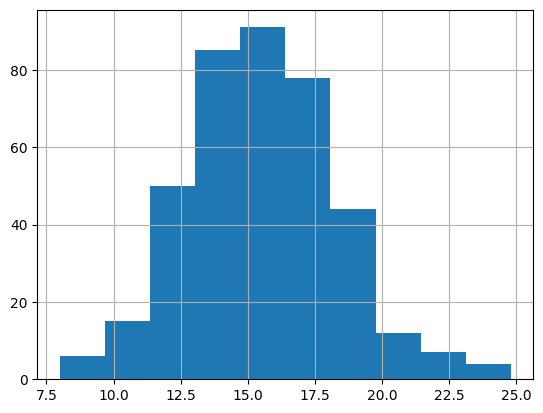

In [8]:
df.acceleration.hist()

<Axes: xlabel='mpg', ylabel='Count'>

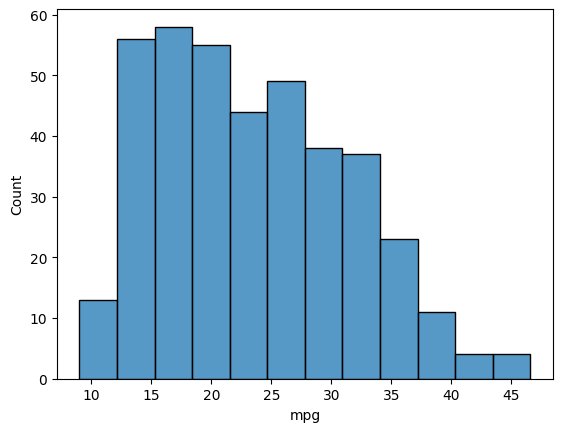

In [13]:
sns.histplot(df.mpg)

In [15]:
df.cylinders.value_counts().sort_index()

,count
cylinders,
3,4
4,199
5,3
6,83
8,103


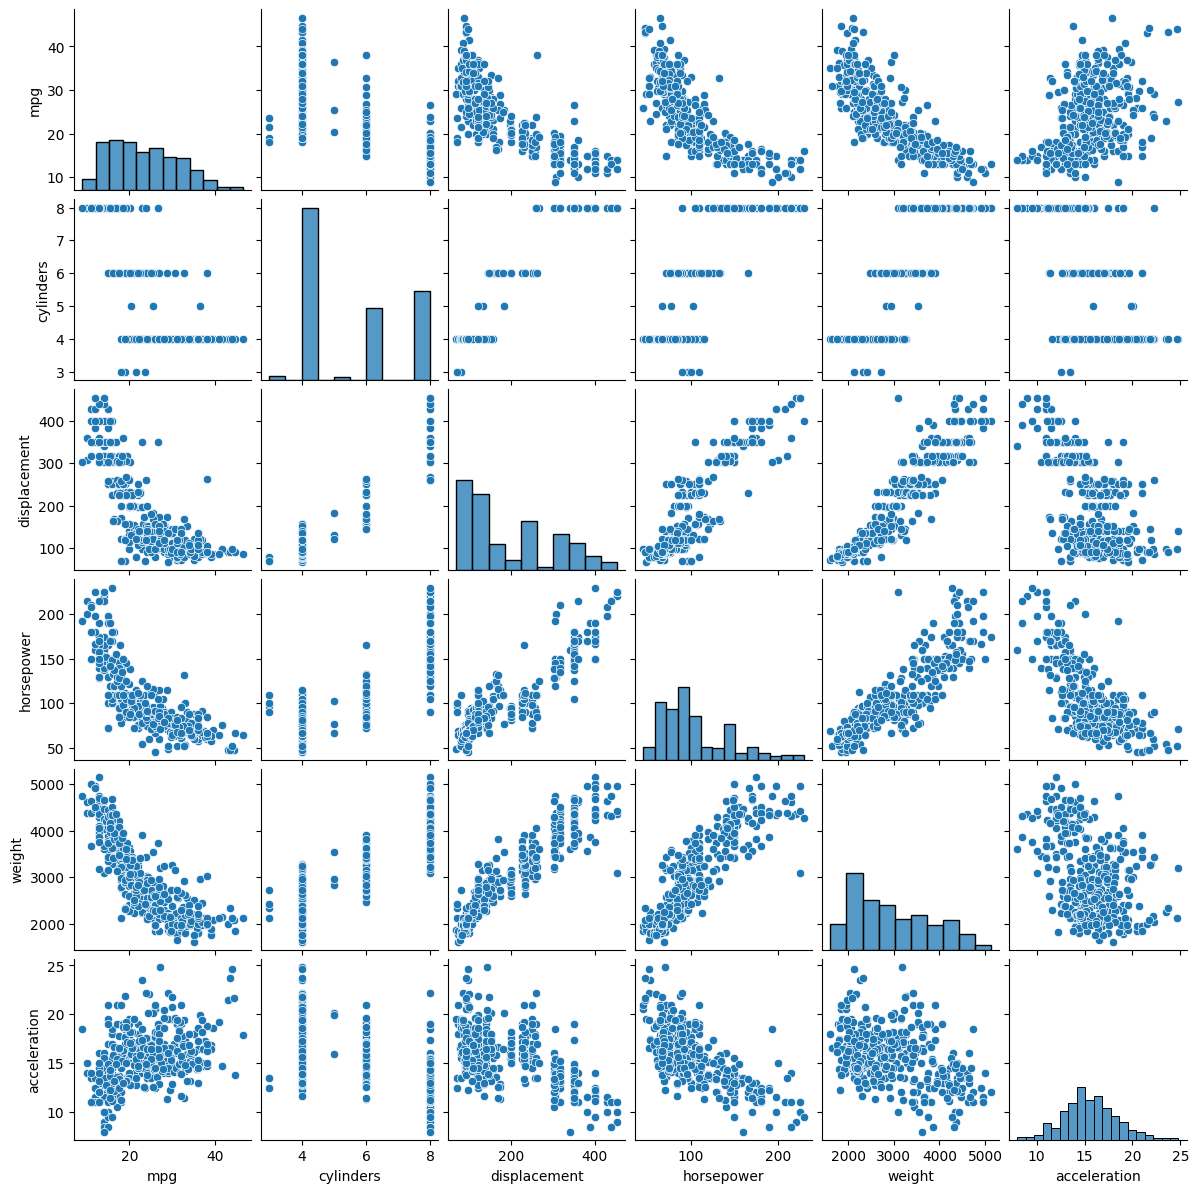

In [18]:
sns.pairplot(data=df[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']])
fig = plt.gcf()
fig.set_size_inches(12, 12)

### Zadanie 5.2

Zbuduj model regresji liniowej zmiennej `mpg` w zależności od `horsepower`. Wykorzystaj pakiet `statsmodels`. Wyświetl podsumowanie modelu. Zbuduj wykres rozrzutu z dopasowaną prostą regresji.

1. Przedstaw model w postaci równania regresji: $\widehat{\text{mpg}}=\hat{\beta}_0+\hat{\beta}_1\cdot\text{horsepower}$.
1. Czy zmienna `mpg` zależy od `horsepower`?
2. Jak silny jest związek między `mpg` a `horsepower`?
3. Czy zależność jest dodatnia czy ujemna?
4. Jak zmieni się `mpg` wraz ze wzrostem `horsepower` o 20?
4. Jaką wartość przewiduje model dla `mpg` przy `horsepower=98`? Jak wygląda przedział ufności i predykcji dla tej wartości (metoda `OLSResults.get_prediction()`)?

In [21]:
import statsmodels.api as sm


In [30]:
model = sm.OLS(endog=df.mpg, exog=sm.add_constant(df.horsepower)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 03 Nov 2025   Prob (F-statistic):           7.03e-81
Time:                        18:00:09   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
p = model.get_prediction(exog=[1, 98])
p.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


<Axes: xlabel='horsepower', ylabel='mpg'>

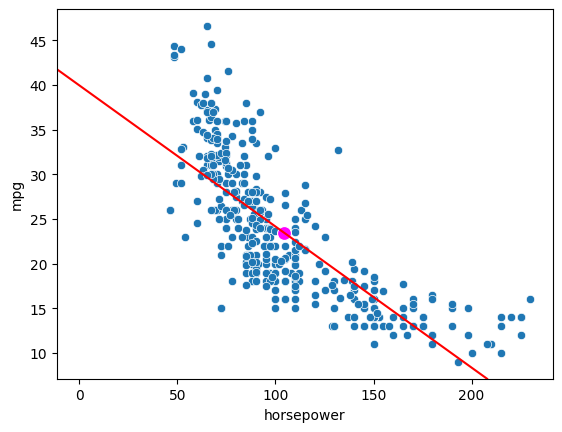

In [41]:
fig, ax = plt.subplots()
sns.scatterplot(data=df, x='horsepower', y='mpg', ax=ax)
ax.axline(xy1=(0, model.params.iloc[0]), slope=model.params.iloc[1], color="red")
sns.scatterplot(x=[df.horsepower.mean()], y=[df.mpg.mean()], ax=ax, s=100, color ="magenta")

### Zadanie 5.3

Rozwiąż zadania 2.4.1 i 2.4.2 z książki [ISLP](https://www.statlearning.com/) (strona 63).

### Zadanie 5.4

Przeprowadź regresję liniową zmiennej `mpg` względem pozostałych zmiennych w zbiorze danych `Auto.csv`. Chcesz uzyskać wysoki współczynnik determinacji i niski błąd średniokwadratowy ale równocześnie jak najprostszy model o dużym stopniu interpretowalności.

Uwzględnij następujące aspekty:

1. Selekcja zmiennych.
2. Transformacja zmiennych.
3. Interakcje zmiennych.
4. Modelowanie nieliniowe.

Przeprowadź diagnostykę modelu. Uwzględnij w niej:

1. Nielinowość w relacji między zmienną celu a predyktorami.
2. Korelację między resztami.
3. Heteroskedastyczność (niejednorodność wariancji reszt).
4. Obserwacje odstające.
5. Obserwacje wpływowe.
6. Współliniowość zmiennych.

(zobacz rozdział 3.3.3 w  [ISLP](https://www.statlearning.com/))


---

In [54]:
vars = ['weight', 'year', 'origin']
formula = 'mpg ~ ' + ' + '.join(vars)
formula

'mpg ~ weight + year + origin'

In [55]:
model = sm.OLS.from_formula(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     579.2
Date:                Mon, 03 Nov 2025   Prob (F-statistic):          7.26e-143
Time:                        18:24:42   Log-Likelihood:                -1027.8
No. Observations:                 392   AIC:                             2064.
Df Residuals:                     388   BIC:                             2080.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.0459      4.001     -4.510      0.000     -25.913     -10.179
weight        -0.0060      0.000    -23.588      0.000      -0.006      -0.005
year           0.7571      0.048     15.668      0.000       0.662       0.852
origin         1.1504      0.259      4.439      0.000       0.641       1.660
==============================================================================
Omnibus:                       39.172   Durbin-Watson:                   1.275
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.003
Skew:                           0.577   Prob(JB):                     3.13e-17
Kurtosis:                       4.823   Cond. No.                     7.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Zadanie 5.5

Rozwiąż zadania 3.7.3, 3.7.4, 3.7.13, 3.7.14, 3.7.15 z [ISLP](https://www.statlearning.com/).

---